In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets.samples_generator import make_blobs
sns.set()

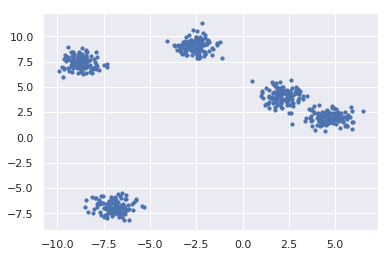

In [2]:
X, y = make_blobs(n_samples=600, centers=5,
                  cluster_std=0.60, random_state=42)
plt.scatter(X[:, 0], X[:, 1], s = 10);

### Elbow Method

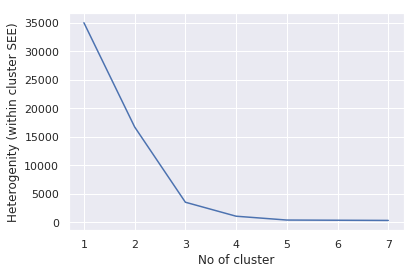

In [3]:
sse_ = []
for k in range(1, 8):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, kmeans.inertia_])
df = pd.DataFrame(sse_)
plt.plot(df[0], df[1]);
plt.xlabel("No of cluster")
plt.ylabel("Heterogenity (within cluster SEE)")
plt.show()

We can take no of cluster as 3,4 or 5

### Silhouette Analysis


$$\text{silhouette score}=\frac{p-q}{max(p,q)}$$

$p$ is the mean distance to the points in the nearest cluster that the data point is not a part of

$q$ is the mean intra-cluster distance to all the points in its own cluster.

* The value of the silhouette score range lies between -1 to 1. 

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster, 

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

In [4]:
from sklearn.metrics import silhouette_score

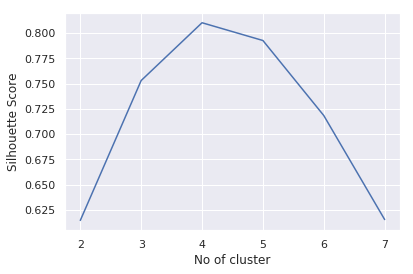

In [5]:
sse_ = []
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k).fit(X)
    sse_.append([k, silhouette_score(X, kmeans.labels_)])
df = pd.DataFrame(sse_)
plt.plot(df[0], df[1]);
plt.xlabel("No of cluster")
plt.ylabel("Silhouette Score")
plt.show()

It suggest no of cluster to be kept as 4